# Training & Visualizing

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [3]:
from sklearn.tree import export_graphviz

def image_path(fig_id):
    return fig_id
export_graphviz(
    tree_clf,
    out_file = image_path("/Users/indrikwijaya/Desktop/decision_tree.dot"),
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded= True,
    filled=True)
    

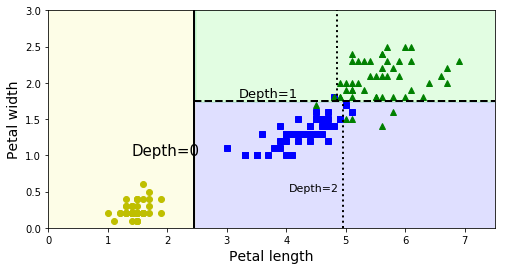

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X,y, axes=[0,7.5,0,3], iris = True, legend = False, plot_training=True):
    x1s = np.linspace(axes[0],axes[1],100)
    x2s = np.linspace(axes[2],axes[3],100)
    x1,x2 = np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1,x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth =10)
    
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha =0.8)
        
    if plot_training:
        plt.plot(X[:,0][y==0],X[:,1][y==0], "yo", label = "Iris-Setosa")
        plt.plot(X[:,0][y==1],X[:,1][y==1],'bs',label = "Iris-Versicolor")
        plt.plot(X[:,0][y==2],X[:,1][y==2],'g^', label = "Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r'$x_2$', fontsize=18, rotation=0)
    if legend:
        plt.legend(loc='lower right', fontsize=14)
        
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf, X,y)
plt.plot([2.45,2.45],[0,3], 'k-', linewidth=2)
plt.plot([2.45,7.5], [1.75,1.75], 'k--', linewidth=2)
plt.plot([4.95,4.95], [0,1.75], 'k:', linewidth=2)
plt.plot([4.85,4.85], [1.75,3], 'k:', linewidth=2)
plt.text(1.40, 1.0, 'Depth=0', fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "Depth=2", fontsize=11)


plt.show()

# Predicting classes and class probabilities

In [5]:
tree_clf.predict_proba([[5,1.5]])

array([[ 0.        ,  0.90740741,  0.09259259]])

In [6]:
tree_clf.predict([[5,1.5]])

array([1])

# Sensitivity to training set details

In [7]:
X[(X[:,1]==X[:,1][y==1].max())&(y==1)] #widest Iris-Versicolor flower

array([[ 4.8,  1.8]])

In [8]:
not_widest_versicolor = (X[:,1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=40, splitter='best')

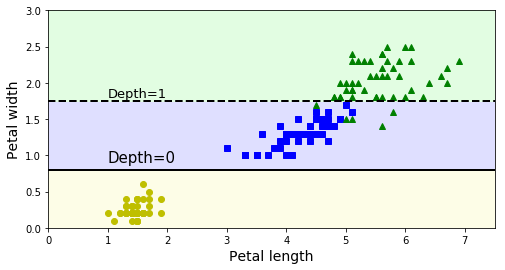

In [9]:
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend = False)
plt.plot([0,7.5], [0.8,0.8], 'k-', linewidth=2)
plt.plot([0,7.5],[1.75,1.75], 'k--', linewidth=2)
plt.text(1.0, 0.9, 'Depth=0', fontsize=15)
plt.text(1, 1.8, 'Depth=1', fontsize=13)

plt.show()

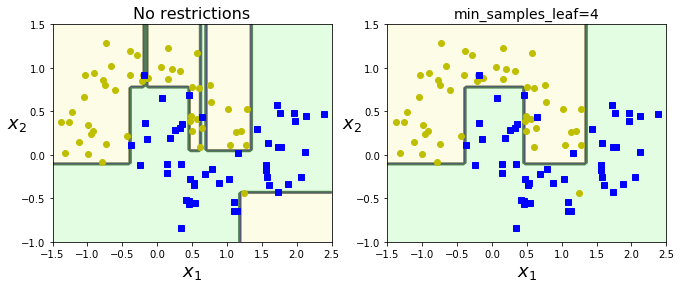

In [10]:
from sklearn.datasets import make_moons
Xm, ym= make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris = False)
plt.title("min_samples_leaf={}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

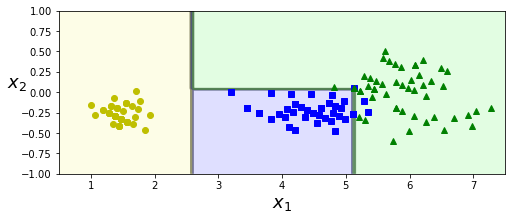

In [11]:
angle = np.pi/180*20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr,y)

plt.figure(figsize=(8,3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1,1],iris = False)
plt.show()

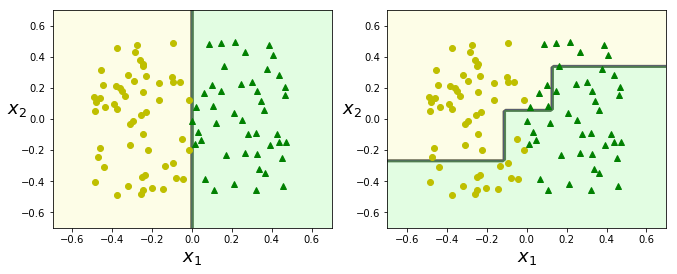

In [12]:
np.random.seed(6)
Xs = np.random.rand(100,2)-0.5
ys = (Xs[:,0]>0).astype(np.float32)*2

angle = np.pi/4
rotation_matrix = np.array([[np.cos(angle),-np.sin(angle)], [np.sin(angle),np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr,ys)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris = False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xs, ys , axes=[-0.7, 0.7, -0.7, 0.7], iris = False)

plt.show()

# Regression

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

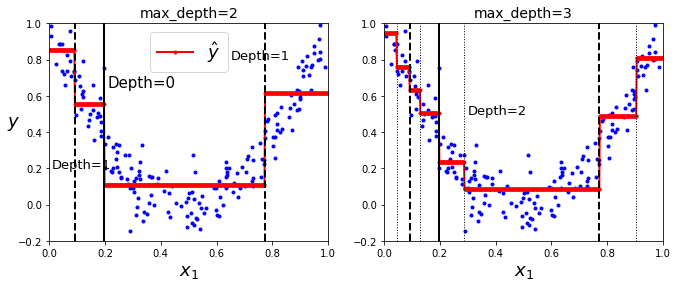

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

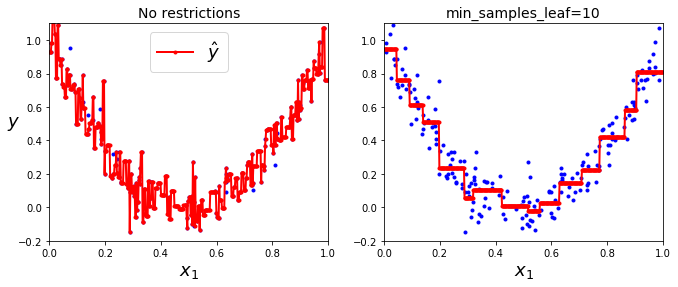

In [15]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

Train n fine-tune a Decision tree for the moons dataset
a) Generate a moons dataset using make_moons(n_samples=10000, noise=0.4)


In [21]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=10000, noise=0.4, random_state=42)


b. split into a trg set n a test set using train_test_split()

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

c. Use grid search w cross-validation (w the help of GridSearchCV class) to find good hyperparam valu DecisionTreeClassifier, Hint: try various values for max_leaf_nodes

In [23]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2,100)), 'min_samples_split':[2,3,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1,
                             verbose=1)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    3.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [24]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=17, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

d. Train it on the full trg set using these hyperparams, n measure ur model's performance on the test set. by default, GridSearchCV trains the best model found on the whole trg set (can change this by setting refit = False), so we dont need to do it again. can simply evaluate the model's accuracy:

In [25]:
from sklearn.metrics import accuracy_score

y_pred=grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.86950000000000005

Exercise: Grow a froest
a) Continuing the previous exercise, generate 1000 subsets of the trg set, each containing 100 instances selected randomly 

In [26]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

b. train one decision tree on each subset, using the hyperparam values found above. evaluate these 1000 decisiont trees on the test set. since they were trained on smaller sets, these decision trees will likely perform worse than the 1st decision trees achieving only about 80% accuracy

In [30]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    ypred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
np.mean(accuracy_scores)

0.86950000000000038

c. now comes the magic. for each test set instance, generate the predictions of the 1000 decision trees, and keep only the most frequent prediction(SciPy's mode()), which gives u majority-vote predictions over the test

In [32]:
Y_pred = np.empty([n_trees, len(X_test)], dtype = np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [33]:
from scipy.stats import mode
y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

d. Evaluate these predictions on the test set: u shd obtain a slightly higher accuracy than ur first model (abt 0.5 - 1.5% higher).

In [34]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872